<a href="https://colab.research.google.com/github/reset-34/Yapay_Zeka_ile_Zaturre_Tespiti_/blob/main/Zaturre0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
#opereyting sistem işletim sistemi klasörlerin içini okumak
import matplotlib.pyplot as plt
#görselleştirme yapmak için
import cv2
#bilgisayarlı görü için resim dosyalarını okuyacak

#iki farklı klasörü birleştirip o yolu elde ediyoruz
base_dir = os.path.join('/content/drive/MyDrive/chest_xray')
train_dir = os.path.join(base_dir, 'train')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
#kendine verilen dosya yolunda ne kadar dosya varsa o listeyi ve içinde
#ne kadar eleman olduğunu sayıyor sayı veriyor
num_pneumonia_train = len(os.listdir(train_pneumonia_dir))
num_normal_train = len(os.listdir(train_normal_dir))

print(f"Eğitim İçin Zatürreli Görüntü Sayısı: {num_pneumonia_train}")
print(f"Eğitim İçin Normal Görüntü Sayısı: {num_normal_train}")

Eğitim İçin Zatürreli Görüntü Sayısı: 3879
Eğitim İçin Normal Görüntü Sayısı: 1341


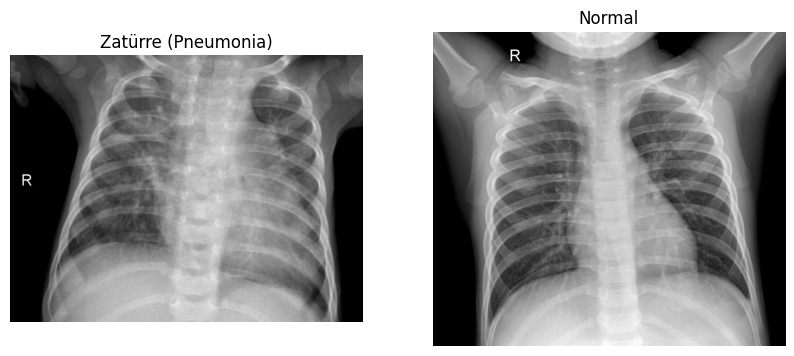

In [ ]:
#zatürre klasöründeki resimleri ve adresini alıyoruz
pneumonia_img_path = os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[0])
normal_img_path = os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])

#Görselleştirme işini burada yapıyoruz boş tuval gibi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
#sola yerleştir demek
plt.title('Zatürre (Pneumonia)')
plt.imshow(cv2.imread(pneumonia_img_path))
plt.axis ('off')

#burada iki fonksiyon var iki kütüphanenin beraber çalıştığı yer verdiğimiz tam resim yolundaki resmi okuyor

plt.subplot(1, 2, 2)
#sağdaki resmi göre
plt.title('Normal')
plt.imshow(cv2.imread(normal_img_path))
plt.axis ('off')
plt.show()

In [ ]:
#bu sınıf bizim tüm karmaşık işleri yapmamızı sağlayacak

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#tüm görüntü verisin sıkıştırıyor daha iyi öğrenmesi için

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #kadar rast gele yukarı aşağı kaydırıyor
    shear_range=0.1,
    #eğmeyi sağlıyor
    zoom_range=0.1,
    #yakın veya uzaklaştırma
    horizontal_flip=True,
    #yatay eksende çeviriyor
    fill_mode='nearest'
    # boş pikselleri ona en yakın pikselle dolduruyor

)

test_val_datagen = ImageDataGenerator(rescale=1./255)
#modelin performansını test ederken sadece normalizasyon yapılır
batch_size = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

#3 tane değişken oluşturduk içindeki resimleri 180e 180 almak istiyoruz
#öğrenme yani ders kitabı gibi örnek sorular veri setinden burada oluyor

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

#sağlıklı ve sağlıksız ı al
#bu da deneme sınavı gibi eğitim sürecinde setin performansı ölçülüyor.

val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
#bu da hiç görülmemiş sorulara gelir gibi burada yeni sorular (veri setleri) oluşmu gerçek dünya gibi
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
    #gerçek etiket sırası karışmaması için
)

#biz niye böldük bunları 3 e yapay zeka modelini adil bir şekilde eğitmek için

Found 5220 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Evrişimli Sinir Ağları
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    #relu=nörondan gelen sinyal pozitifse bir sonraki katmana iletiyor
    MaxPooling2D ((2, 2)),
    #özellikleri koruyup küçültüyor

    Conv2D(64, (3, 3),activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
#öğrenme sayısını arttırmak için dedektör sayısını 128 e çıkarıyoruz
#Flatten düzleştirici katman önceki katmanlardan gelen 2 boyutlu özellik haritalarını alıyor tek boyutlu uzun liste haline getiriyor
#Bu görüntülerden öğrendiğimiz tüm bilgileri karar verecek olan beyin katmanlarına göndermek için bu adım
#Dense standart sinir ağı katmanı katmanda 512 sinir ağı var
#Dropout ezberlemeyi önler
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
#Nihayi kararı verecek tek çıkış neronu, ikili sınıflandırma modeli için sigmoid kullandım sağlıklı yada sağlıksız diyecek
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,308,673 (100.36 MB)

 Trainable params: 26,308,673 (100.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: beynimizin öğrenme stili, adam : ise sürekli belli zamanda çalışması gibi öğrenme adımını küçültür çalışır
#loss: kayıp fonksiyonunu ölçüyor binary_crossentropy : ise iki seçenekli sınıflandırma hata ölçüm için
#metrics: başarı notu bizim anladığımız şekliyle accurracy : doğruluk başarısı

#epocs eğitim setinin baştan sona tam tur nasıl geçecek öğrenecek
epochs = 10
history = model.fit(
#history: öğrenme günlüğü karne gibi bu
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
#bir epocs kaç seferde bitiyor ona bakıyor toplam resim sayısı
    epochs=epochs,
    validation_data=val_generator ,
    validation_steps=val_generator.samples // batch_size
#modele deneme sınavın bu diyoruz görüntülerle kontrol edecek // deneme sınavı kaç adımda bitiyor

)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 810s 5s/step - accuracy: 0.7671 - loss: 0.6493 - val_accuracy: 0.6250 - val_loss: 1.1363
Epoch 2/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 5:57 2s/step - accuracy: 0.7188 - loss: 0.8219

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7188 - loss: 0.8219 - val_accuracy: 0.6875 - val_loss: 0.8764
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.8765 - loss: 0.2795 - val_accuracy: 0.6875 - val_loss: 0.9679
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.6820 - val_accuracy: 0.7500 - val_loss: 0.8305
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.8837 - loss: 0.2765 - val_accuracy: 0.7500 - val_loss: 0.5834
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9375 - loss: 0.1912 - val_accuracy: 0.7500 - val_loss: 0.6401
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.9086 - loss: 0.2185 - val_accuracy: 0.9375 - val_loss: 0.3418
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.1446 - val_accuracy: 0.7500 - val_loss: 0.4498
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.9273 - loss: 0.1799 - val_accuracy: 0.8125 - 

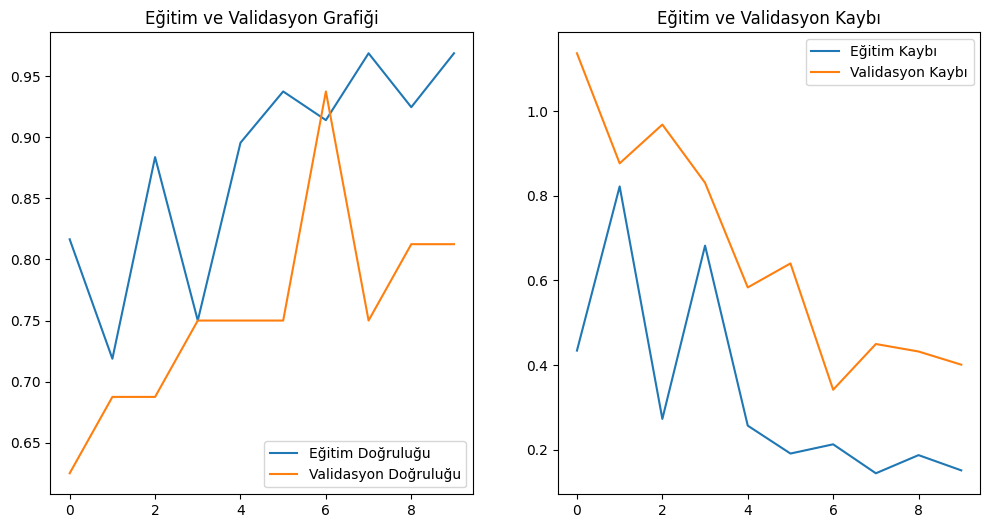


Model 'pneumonia_detector.h5'adıyla başarıyla kayıt edildi.
Bu dosyayı artık tekli tahminlerle de kullanabilirsiniz.


In [ ]:
acc = history.history['accuracy']
#model fitten gelen etiket değer çifti telefon defteri gibi
val_acc = history.history['val_accuracy']
#deneme sınavı gibi onun notu

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
#0 dan 9 a kadar içeren sayılar yatay eksen

#burada grafik kodlarını yazmaya başlayacağız
#plt çiz komutudur
plt.figure(figsize=(12, 6))
#tablo oluşturma
plt.subplot(1, 2, 1)
#1 satır 2 sütundan oluşan tablo ilk grafik 1. kutucukta
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Validasyon Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Validasyon Grafiği')

#eğitim kaybı ve validasyon kaybını alıyoruz yani hata puanlarını modelin hatalardan ders almasını sağlar
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Validasyon Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Validasyon Kaybı')
plt.show()

model.save('pneumonia_detector.h5')
print("\nModel 'pneumonia_detector.h5'adıyla başarıyla kayıt edildi.")
#adını değiştirdik
print("Bu dosyayı artık tekli tahminlerle de kullanabilirsiniz.")

# Bu grafik bize modelin çok iyi ezberlediğini gösteriyor , gerçekte zorlanan bir öğrenme var
# Aşırı öğreniyor


In [ ]:
# Aşırı öğrenme problemini çözüyoruz burada erken durdurma modeli en iyi yerinde durdurma
# Modelin içinde ki norönları tembellikten kurtarıp takım çalışmasına yönlendiriyor

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
#kural seti oluşturduk monitor kısmı neyi izleyecek onu söylemek patience ise sabır derecesini belirliyor
#değeri true olarak ayarlandığında en iyi olduğu ağırlık geri yükleme




In [ ]:
history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    callbacks = [early_stopping]
)

# Veri arttırma

train_datagen = ImageDataGenerator(
#resimlere hangi değişiklikler olacak aşağıda kurallar var
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)

Dense(512, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')


Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 511s 3s/step - accuracy: 0.9051 - loss: 0.2203 - val_accuracy: 0.7500 - val_loss: 0.5400
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.9285 - loss: 0.1847 - val_accuracy: 0.8750 - val_loss: 0.2722
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 522s 3s/step - accuracy: 0.9431 - loss: 0.1548 - val_accuracy: 0.8125 - val_loss: 0.2842
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 499s 3s/step - accuracy: 0.9417 - loss: 0.1761 - val_accuracy: 0.9375 - val_loss: 0.2351
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.9424 - loss: 0.1469 - val_accuracy: 0.6875 - val_loss: 0.4146
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.9420 - loss: 0.1379 - val_accuracy: 0.7500 - val_loss: 0.3102
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 487s 3s/step - accuracy: 0.9424 - loss: 0.1497 - val_accuracy: 0.6875 - val_loss: 0.5652


<Dense name=dense_3, built=False>

In [ ]:
# Modelin ne tür hatalar yaptığını görücez normal normal olmayan görüntüleri ayırt ediyoruz

test_loss, test_accuracy = model.evaluate(test_generator, steps= test_generator.samples // batch_size) #modeli değerlendirme
print(f"Test Seti Doğruluğu : {test_accuracy * 100 :.2f}")
print(f"Test Seti Kaybı : {test_loss :.4f}%")



19/19 ━━━━━━━━━━━━━━━━━━━━ 192s 11s/step - accuracy: 0.7889 - loss: 0.4480
Test Seti Doğruluğu : 87.01
Test Seti Kaybı : 0.2916%


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 867ms/step


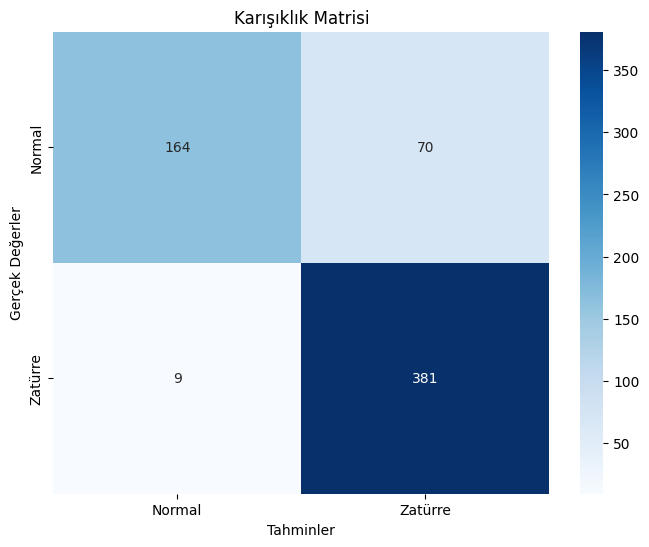


Sınıflandırma Raporu: 
              precision    recall  f1-score   support

      Normal       0.95      0.70      0.81       234
     Zatürre       0.84      0.98      0.91       390

    accuracy                           0.87       624
   macro avg       0.90      0.84      0.86       624
weighted avg       0.88      0.87      0.87       624



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
#kütüphane seaborn makyaj gibi renklendiriyor

# Modelde sınava giren öğrencinin sınav kağıdı gibi
predictions = model.predict(test_generator, steps = test_generator.samples // batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
#modelin cevap kağıdındaki sayılar gibi
#olasılığa göre 1 0 sayılarına çevirip sonucun düz liste olmasını sağlıyor.
true_classes = test_generator.classes
# Confusion Matrix oluşturma
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Zatürre'], yticklabels=['Normal', 'Zatürre'])
plt.xlabel('Tahminler')
plt.ylabel('Gerçek Değerler')
plt.title('Karışıklık Matrisi')
plt.show()

print("\nSınıflandırma Raporu: ")
print(classification_report(true_classes, predicted_classes, target_names=['Normal', 'Zatürre']))


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2001s 12s/step - accuracy: 0.8267 - loss: 0.3784 - val_accuracy: 0.7500 - val_loss: 0.5171
Epoch 2/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 28:25 11s/step - accuracy: 0.9062 - loss: 0.1929

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9062 - loss: 0.1929 - val_accuracy: 0.7500 - val_loss: 0.4980
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1888s 12s/step - accuracy: 0.9123 - loss: 0.2081 - val_accuracy: 0.8125 - val_loss: 0.4057
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9688 - loss: 0.1294 - val_accuracy: 0.8125 - val_loss: 0.3741
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1896s 12s/step - accuracy: 0.9192 - loss: 0.2006 - val_accuracy: 0.7500 - val_loss: 0.4410
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.8438 - loss: 0.2979 - val_accuracy: 0.7500 - val_loss: 0.4563
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1924s 12s/step - accuracy: 0.9233 - loss: 0.1810 - val_accuracy: 0.7500 - val_loss: 0.6597
20/20 ━━━━━━━━━━━━━━━━━━━━ 223s 11s/step


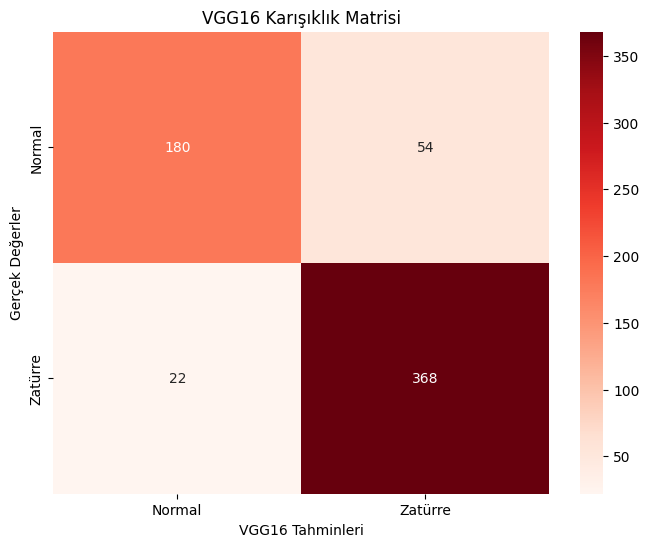


VGG16 Sınıflandırma Raporu:
              precision    recall  f1-score   support

      Normal       0.89      0.77      0.83       234
     Zatürre       0.87      0.94      0.91       390

    accuracy                           0.88       624
   macro avg       0.88      0.86      0.87       624
weighted avg       0.88      0.88      0.88       624



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 696s 4s/step - accuracy: 0.7136 - loss: 0.6032 - val_accuracy: 0.5000 - val_loss: 0.8272
Epoch 2/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 9:00 3s/step - accuracy: 0.6562 - loss: 0.6710

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6562 - loss: 0.6710 - val_accuracy: 0.5000 - val_loss: 0.7955
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.7394 - loss: 0.5681 - val_accuracy: 0.5000 - val_loss: 0.9254
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7812 - loss: 0.5280 - val_accuracy: 0.5000 - val_loss: 0.9269
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 726s 4s/step - accuracy: 0.7478 - loss: 0.5461 - val_accuracy: 0.5000 - val_loss: 0.8627


In [ ]:
import numpy as np # Sayısal işlemler ve dizi manipülasyonu için
import matplotlib.pyplot as plt # Veri görselleştirme (grafikler) için
import seaborn as sns # Daha gelişmiş istatistiksel görselleştirmeler için
from sklearn.metrics import confusion_matrix, classification_report # Başarı metriklerini hesaplamak için
# Keras'tan önceden eğitilmiş modelleri içe aktırma
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# VGG16 modelinin test verileri üzerindeki tahminlerinin ne kadarının doğru,
# ne kadarının yanlış olduğunu ve hangi sınıfları birbiriyle karıştırdığını gösteren görsel bir dökümdür.

# VGG16 modelini yükleme (ImageNet ağırlıklarıyla ve üst katmanlar hariç)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# VGG16 modelinin katmanlarını dondurma
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Üst katmanları ekleme
x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x) # 2B özellik haritalarını tek boyutlu vektöre indirir
x = Dense(512, activation='relu')(x) # 512 nöronlu ara katman, karmaşık özellikleri öğrenir
x = Dropout(0.5)(x) # Nöronların %50'sini rastgele devre dışı bırakarak aşırı öğrenmeyi (ezberlemeyi) önler

# Aşırı öğrenmeyi engellemek için Dropout ekleniyor
predictions_vgg16_output = Dense(1, activation='sigmoid')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions_vgg16_output)

# Modeli derleme
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# VGG16 modelini eğitme
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    # Epok sayısını ihtiyaca göre ayarlayabilirsiniz
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping] # Model gelişmiyorsa eğitimi otomatik durdurur
)

# Test veriri üzerinde tahmin yapma
predictions_vgg16 = model_vgg16.predict(test_generator, steps = test_generator.samples // batch_size + 1)
# Olasılık değerlerini 0.5 eşiğine göre 0 veya 1 sınıfına dönüştürme
predicted_classes_vgg16 = (predictions_vgg16 > 0.5).astype(int).flatten()

# Gerçek etiketleri alıyoruz
true_classes = test_generator.classes
# Karışıklık Matrisi (vgg16) hesaplama
cm_vgg16 = confusion_matrix(true_classes, predicted_classes_vgg16)
# Matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Zatürre'], yticklabels=['Normal', 'Zatürre'])
plt.xlabel('VGG16 Tahminleri')
plt.ylabel('Gerçek Değerler')
plt.title('VGG16 Karışıklık Matrisi')
plt.show()

# Detaylı başarı raporu (Precision, Recall, F1-Score)
print("\nVGG16 Sınıflandırma Raporu:")
print(classification_report(true_classes, predicted_classes_vgg16, target_names=['Normal', 'Zatürre']))

print("\n" + "="*50 + "\n")

# ResNet50 modelini yükleme (ImageNet ağırlıklarıyla ve üst katmanlar hariç)
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# ResNet50 modelinin katmanlarını dondurma
for layer in base_model_resnet50.layers:
    layer.trainable = False

# Üst katmanları ekleme
y = base_model_resnet50.output
y = GlobalAveragePooling2D()(y)
y = Dense(512, activation='relu')(y)
y = Dropout(0.5)(y)
# Aşırı öğrenmeyi engellemek için Dropout ekleniyor
predictions_resnet50_output = Dense(1, activation='sigmoid')(y)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions_resnet50_output)

# Modeli derleme
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ResNet50 modelini eğitme
history_resnet50 = model_resnet50.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    # Epok sayısını ihtiyaca göre ayarlayabilirsiniz
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step


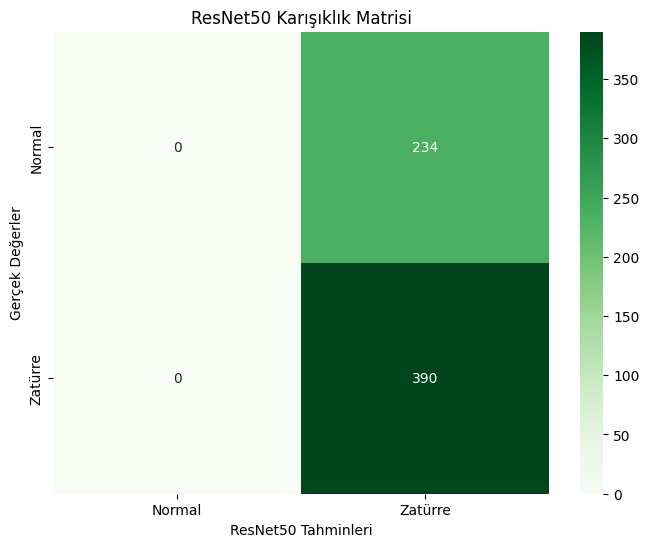


ResNet50 Sınıflandırma Raporu:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       234
     Zatürre       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Tahminleri Hesaplama
# ResNet50 modelinin test verileri üzerindeki tahminlerinin ne kadarının doğru,
# ne kadarının yanlış olduğunu ve hangi sınıfları birbiriyle karıştırdığını gösteren görsel bir dökümdür
predictions_resnet50 = model_resnet50.predict(test_generator, steps = test_generator.samples // batch_size + 1)
predicted_classes_resnet50 = (predictions_resnet50 > 0.5).astype(int).flatten()

# Karışıklık Matrisi (ResNet50)
cm_resnet50 = confusion_matrix(true_classes, predicted_classes_resnet50)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet50, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Zatürre'], yticklabels=['Normal', 'Zatürre'])
plt.xlabel('ResNet50 Tahminleri')
plt.ylabel('Gerçek Değerler')
plt.title('ResNet50 Karışıklık Matrisi')
plt.show()

print("\nResNet50 Sınıflandırma Raporu:")
print(classification_report(true_classes, predicted_classes_resnet50, target_names=['Normal', 'Zatürre']))

 1. Orijinal CNN Model Grafikleri 


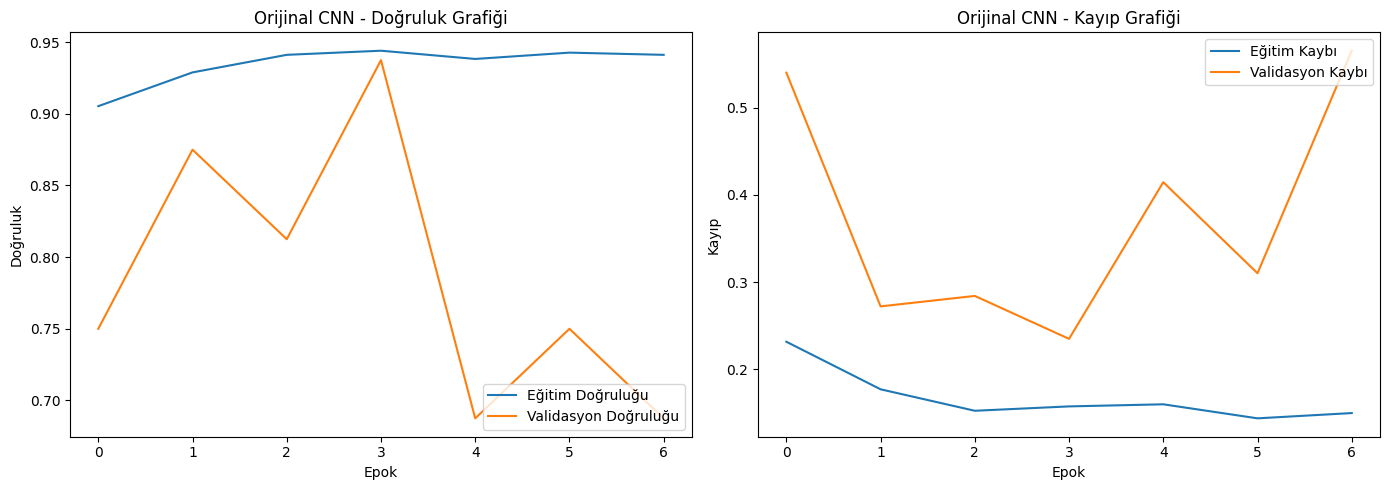

 2. VGG16 Model Grafikleri 


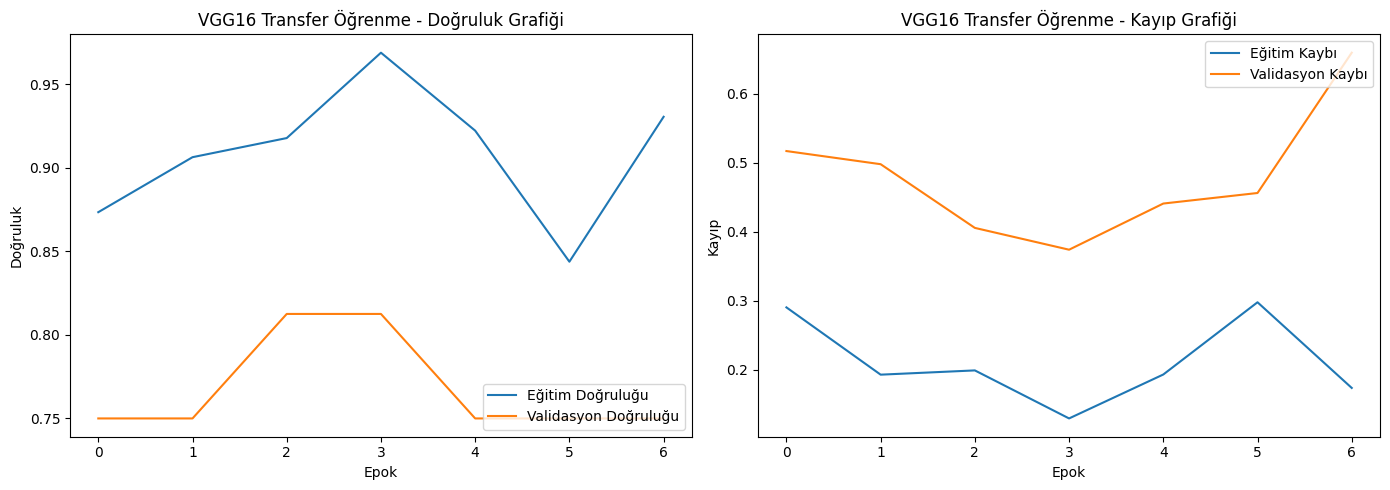

 3. ResNet50 Model Grafikleri 


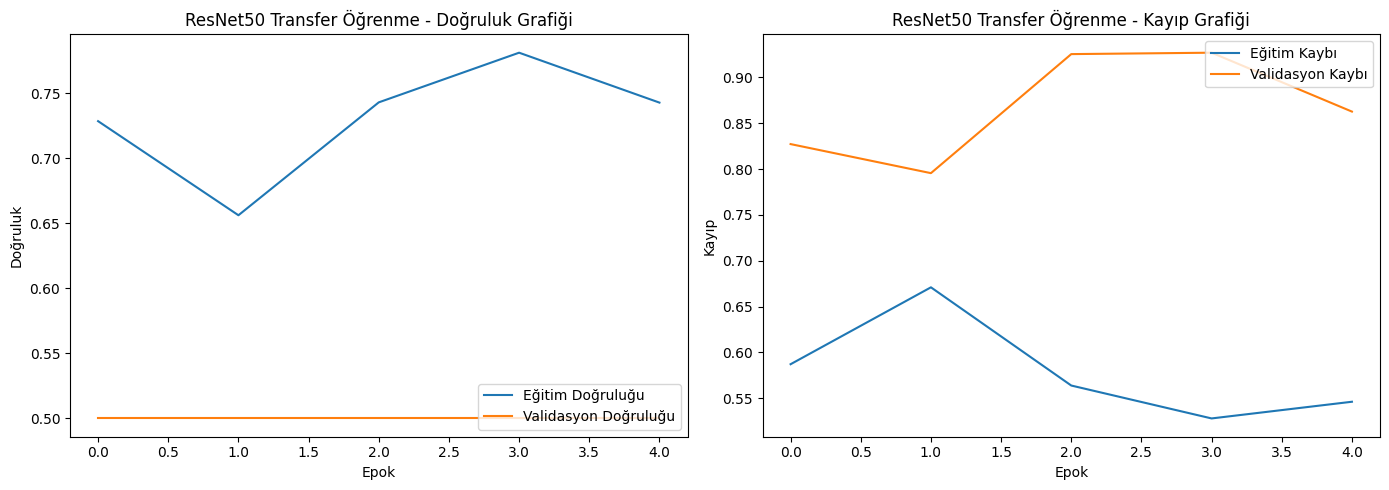

In [ ]:
# Eğitim Grafikleri

def plot_history(history, title):

    #Belirli bir modelin Doğruluk ve Kayıp grafiğini çizen yardımcı fonksiyon.

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))
    # epochs sayısını otomatik belirler

    plt.figure(figsize=(14, 5))

    # Doğruluk Grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
    plt.plot(epochs_range, val_acc, label='Validasyon Doğruluğu')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Doğruluk Grafiği')
    plt.xlabel('Epok')
    plt.ylabel('Doğruluk')

    # Kayıp Grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Eğitim Kaybı')
    plt.plot(epochs_range, val_loss, label='Validasyon Kaybı')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Kayıp Grafiği')
    plt.xlabel('Epok')
    plt.ylabel('Kayıp')

    plt.tight_layout()
    plt.show()


print(" 1. Orijinal CNN Model Grafikleri ")
plot_history(history, 'Orijinal CNN')



print(" 2. VGG16 Model Grafikleri ")
plot_history(history_vgg16, 'VGG16 Transfer Öğrenme')
# plot_history(history_vgg16, 'VGG16 Transfer Öğrenme')
# VGG16'nın eğitim grafiği genellikle daha istikrarlı olur.


print(" 3. ResNet50 Model Grafikleri ")
plot_history(history_resnet50, 'ResNet50 Transfer Öğrenme')
# plot_history(history_resnet50, 'ResNet50 Transfer Öğrenme')
# ResNet50'nin eğitim grafiği, daha derin bir model olmasına rağmen, VGG16'dan farklı sonuçlar verebilir.

In [ ]:
# Başari Özeti Gösteren Tablo
import pandas as pd
from sklearn.metrics import classification_report

def get_model_summary(true_classes, predicted_classes, model_name, target_names):

#Sınıflandırma raporundan ana metrikleri (accuracy, macro avg) çıkarır.

    report = classification_report(true_classes, predicted_classes, target_names=target_names, output_dict=True)

    # Global metrikleri alma
    accuracy = report['accuracy']
    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']

    # Sonuçları bir sözlük olarak döndürme
    return {
        'Model': model_name,
        'Doğruluk (Accuracy)': f'{accuracy:.4f}',
        'Makro Kesinlik (Macro Precision)': f'{macro_precision:.4f}',
        'Makro Duyarlılık (Macro Recall)': f'{macro_recall:.4f}',
        'Makro F1 Skoru (Macro F1)': f'{macro_f1:.4f}'
    }

# Sınıf İsimleri (Zatürre projemiz için varsayılan)
TARGET_NAMES = ['Normal', 'Zatürre']

# 1. CNN Metriklerini Hesaplama (Varsayılan olarak CNN tahminlerimizin 'predicted_classes_cnn' içinde olduğunu varsayıyoruz)

cnn_summary = get_model_summary(true_classes, predicted_classes, 'CNN (Orijinal)', TARGET_NAMES)

# 2. VGG16 Metriklerini Hesaplama

vgg16_summary = get_model_summary(true_classes, predicted_classes_vgg16, 'VGG16 (Transfer)', TARGET_NAMES)

# 3. ResNet50 Metriklerini Hesaplama


resnet50_summary = get_model_summary(true_classes, predicted_classes_resnet50, 'ResNet50 (Transfer)', TARGET_NAMES)


# Tüm özetleri liste halinde birleştirme
summary_data = [cnn_summary, vgg16_summary, resnet50_summary]

# DataFrame (Tablo) oluşturma
summary_df = pd.DataFrame(summary_data)

# Tabloyu çıktı olarak gösterme
print("             MODEL BAşARI METRİKLERİ ÖZET TABLOSU")
print("="*70)
print(summary_df.to_string(index=False))
# Index numaralarını göstermeden tabloyu yazdırır



             MODEL BAşARI METRİKLERİ ÖZET TABLOSU
              Model Doğruluk (Accuracy) Makro Kesinlik (Macro Precision) Makro Duyarlılık (Macro Recall) Makro F1 Skoru (Macro F1)
     CNN (Orijinal)              0.8734                           0.8964                          0.8389                    0.8560
   VGG16 (Transfer)              0.8782                           0.8816                          0.8564                    0.8660
ResNet50 (Transfer)              0.6250                           0.3125                          0.5000                    0.3846


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


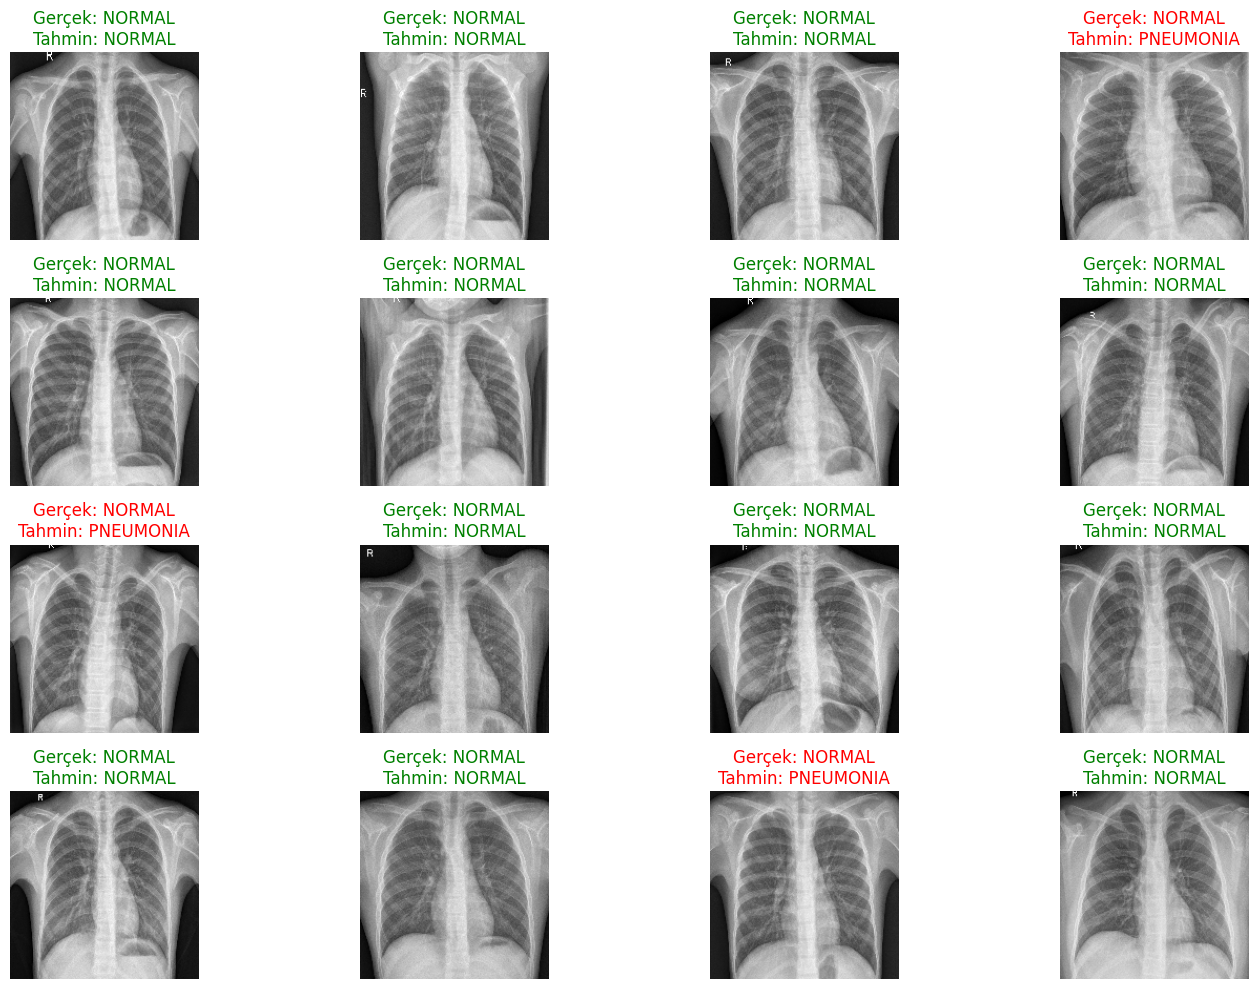

In [ ]:
# Test setinden rastgele bir grup röntgen filmi seçip modelimize bu filmleri tek tek gösterip
# Her biri için ne teşhis koyduğunu sorucaz doğruysa yeşil yanlışsa kırmızı olacak

class_labels = { v: k for k, v in train_generator.class_indices.items()}
# bu kodla sayıdan kelimeye erişim yapıyoruz
images, labels = next(test_generator)
predictions = model.predict(images)
#resimlerin her biri için tahmin yapıyor
plt.figure(figsize=(15,10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    true_label = class_labels[labels[i]]
    predicted_label = class_labels[(predictions[i] > 0.5).astype(int)[0]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"Gerçek: {true_label}\nTahmin: {predicted_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()



